In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy.random import normal, poisson, beta
from scipy.linalg import sqrtm
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.models import DCSBMEstimator, EREstimator, SBMEstimator
from graspologic.models.sbm import _block_to_full, _get_block_indices
from graspologic.simulations import er_np, sbm, rdpg
from graspologic.plot import heatmap
%matplotlib inline

In [30]:
n = 1000
K = 2

## Set seed to repeat the simulation
np.random.seed(171171)
q = np.array([int(x) for x in np.linspace(0,n,num=K,endpoint=False)])
z = np.zeros(n,dtype=int)
for k in range(K):
    z[q[k]:] = kn = 1000



## Set seed to repeat the simulation
np.random.seed(171171)
q = np.array([int(x) for x in np.linspace(0,n,num=K,endpoint=False)])
z = np.zeros(n,dtype=int)
for k in range(K):
    z[q[k]:] = k

B = np.array([[0.1, 0.05],
              [0.05, 0.15]])

community_sizes = [n // 2, n // 2]


rho = np.random.beta(2, 1, size=n)
A=np.zeros((n,n))
for i in range(n-1):
        for j in range(i+1,n):
            edge = np.random.binomial(n=1,p=rho[i]*rho[j]*B[z[i],z[j]],size=1)
            A[i,j] = edge
            A[j,i] = edge
labels_c1 = [0] * community_sizes[0]
labels_c2 = [1] * community_sizes[1]
labels_scatter = np.array(labels_c1 + labels_c2)

ase = AdjacencySpectralEmbed(n_components=2, check_lcc=False)

graph_latent = ase.fit_transform(A)

In [31]:
def simple_scatter(X, ax, y=None):
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        s=15,
        linewidth=0.25,
        alpha=0.5,
        ax=ax,
        legend=False,
    )
    ax.set(xticks=[-0.6, 0.1], yticks=[-0.5, 0.5], xlabel=r"$\mathbf{X}_1$", ylabel=r"$\mathbf{X}_2$", xlim=(-1, 1), ylim=(-1, 1), title=r"$\hat\mathbf{X}$")
    #ax.set(xticks=[-0.15, 0.5, 1], yticks=[-1, 0, 1], xlabel=r"$\mathbf{X}_1$", ylabel=r"$\mathbf{X}_2$", ylim=(-0.15, 1), xlim=(-1, 1), title=r"$\hat\mathbf{X}$")

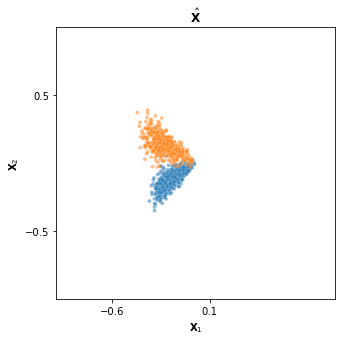

In [32]:
rotation_angle = np.radians(190)
R = np.array([[np.cos(rotation_angle),   -np.sin(rotation_angle)],[np.sin(rotation_angle), np.cos(rotation_angle)]])
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
simple_scatter(graph_latent @ R, ax, y=labels_scatter)

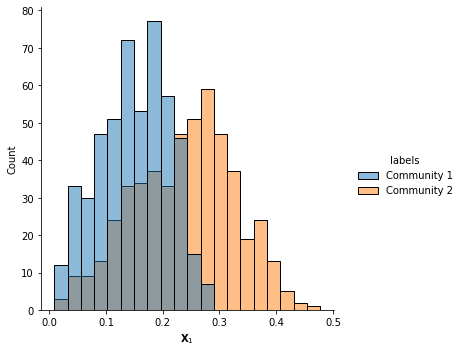

In [33]:
import pandas as pd

labels_1 = ["Community 1"]*community_sizes[0]
labels_2 = ["Community 2"]*community_sizes[1]
labels = np.array(labels_1 + labels_2)

x1_hist = {r"$\mathbf{X}_1$": graph_latent[:, 0], 'labels': labels}
x1_hist = pd.DataFrame(data=x1_hist)

sns.displot(data=x1_hist, x=r"$\mathbf{X}_1$", hue="labels", bins = 20)

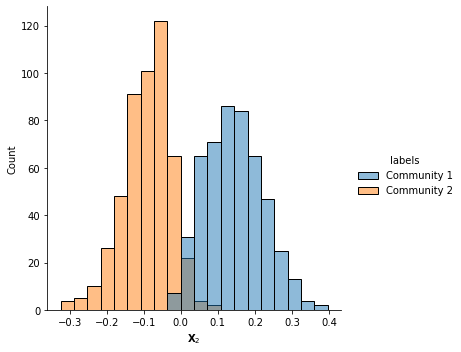

In [34]:
x2_hist = {r"$\mathbf{X}_2$": graph_latent[:, 1], 'labels': labels}
x2_hist = pd.DataFrame(data=x2_hist)

sns.displot(data=x2_hist, x=r"$\mathbf{X}_2$", hue="labels", bins = 20)

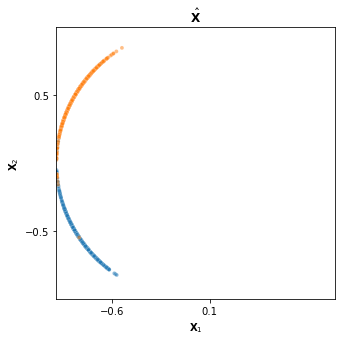

In [35]:
from sklearn.preprocessing import normalize

X_norm = normalize(graph_latent@R)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
simple_scatter(X_norm, ax, y=labels_scatter)

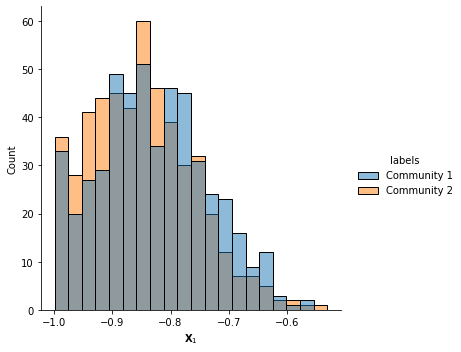

In [36]:
x1norm_hist = {r"$\mathbf{X}_1$": X_norm[:, 0], 'labels': labels}
x1norm_hist = pd.DataFrame(data=x1norm_hist)

sns.displot(data=x1norm_hist, x=r"$\mathbf{X}_1$", hue="labels", bins = 20)

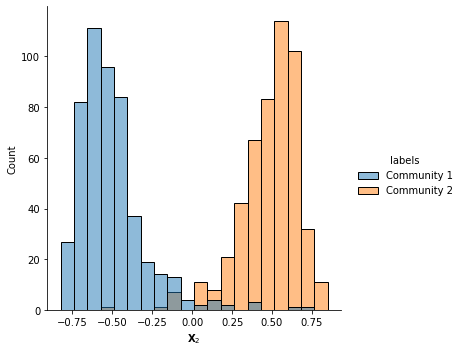

In [21]:
x2norm_hist = {r"$\mathbf{X}_2$": X_norm[:, 1], 'labels': labels}
x2norm_hist = pd.DataFrame(data=x2norm_hist)

sns.displot(data=x2norm_hist, x=r"$\mathbf{X}_2$", hue="labels", bins=20)

In [37]:
## Takes a vector and returns its spherical coordinates
def cart_to_sphere(x):
    ## theta_1
    q = np.arccos(x[1] / np.linalg.norm(x[:2]))
    sphere_coord = [q] if x[0] >= 0 else [2*np.pi - q]
    ## Loop for theta_2, ..., theta_m-1
    for j in range(2,len(x)):
        sphere_coord += [2 * np.arccos(x[j] / np.linalg.norm(x[:(j+1)]))]
    ## Return the result in a numpy array
    return np.array(sphere_coord)

## Takes a matrix and returns the spherical coordinates obtained along the given axis
def theta_transform(X,axis=1):
    ## Apply the function theta_transform along the axis
    return np.apply_along_axis(func1d=cart_to_sphere, axis=axis, arr=X)

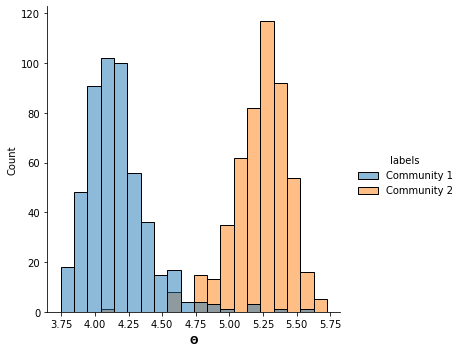

In [46]:
theta = theta_transform(graph_latent@R)

theta_hist = {r"$\mathbf{\Theta}$": theta[:,0], 'labels': labels}
theta_hist = pd.DataFrame(data=theta_hist)

sns.displot(data=theta_hist, x=r"$\mathbf{\Theta}$", hue="labels", bins = 20)